In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Produce knn boundary graphs
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

# Import datatypes for parameter type specification
from pandas.core import frame
from sklearn.preprocessing._label import LabelEncoder

In [2]:
# read scaled data for non-target attributes
X = pd.read_csv("X.csv")
MIN = pd.read_csv("MIN.csv")
MAX = pd.read_csv("MAX.csv")

# read the target attribute
y = pd.read_csv("y.csv")
display(y)

,model
0,Fiesta
1,Focus
2,Focus
3,Fiesta
4,Fiesta
...,...
17960,Fiesta
17961,B-MAX
17962,B-MAX
17963,Focus


In [3]:
# encode a single column from a dataframe
def encode_y(y:frame.DataFrame) -> dict:
    y = y.squeeze()
    labEnc_y = LabelEncoder()
    labEnc_y = labEnc_y.fit(y)
    y = pd.DataFrame(labEnc_y.transform(y), columns=[y.name])
    return dict(y=y,encoder=labEnc_y)

def unencode_y(y:frame.DataFrame, encoder:LabelEncoder):
    # use sklearn.preprocessing.LabelEncoder.inverse_transform() 
    # to revert the encoded data
    y = y.squeeze()
    return(pd.DataFrame(encoder.inverse_transform(y), columns=[y.name]))

# study interactions

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
encode_yItem = encode_y(y_train)
labels_train = encode_yItem.get("y")

# # Use this variable to re-encode y labels
# encoder = encode_yItem.get("encoder")

In [6]:
# display(y_train.head())
# pd.plotting.scatter_matrix(X_train,
#                            c=labels_train.squeeze(),
#                            hist_kwds={'bins':20},
#                            figsize=(15,15))
# plt.show()
# print(type(y_train), type(y_test))

# Plot a 2d knn as an example

### Select two attributes for the KNN model

In [7]:
names_2d = ["mpg", "price"]
X2d_train = X_train.loc[:, names_2d]
y_train = np.ravel(y_train)
print(y_train)


[' Fiesta' ' Fiesta' ' Focus' ... ' Fiesta' ' Kuga' ' Kuga']


### Build the model from the training set
- show boundaries for the trained model.
- points from the training set are labeled based on the car models

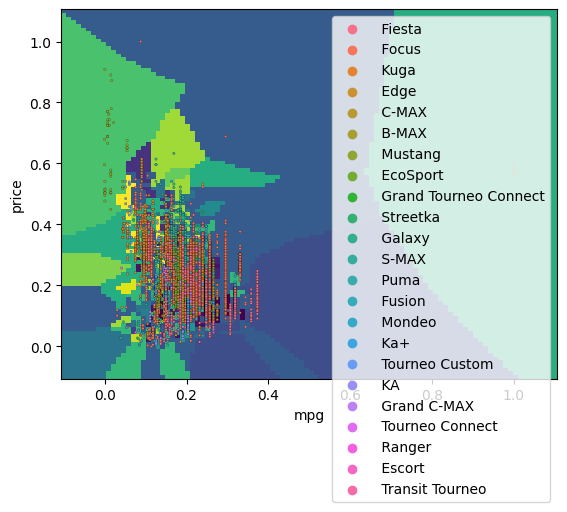

In [8]:
knn = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn.fit(X2d_train, y_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X2d_train,
    grid_resolution=100,
    eps=0.1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names_2d[0],
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X2d_train[names_2d[0]],
    y=X2d_train[names_2d[1]],
    hue=y_train,
    alpha=1.0,
    edgecolor="black",
    s=3
)

# plt.gcf().set_size_inches(9,5)
# plt.gcf().align_xlabels()

plt.show()


# Assess accuracy for the sample KNN model

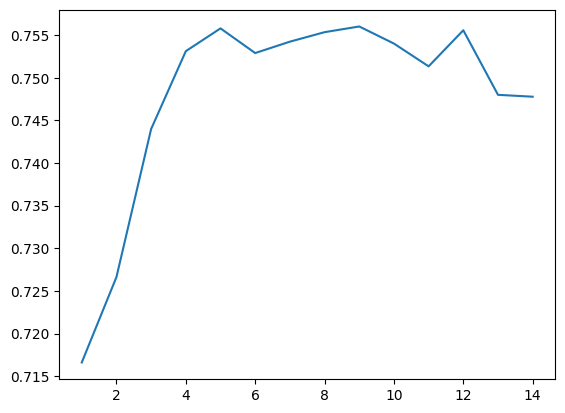

In [9]:
X2d_test = X_test.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y_test = y_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X2d_train, y_train)
    y_predict = knn.predict(X2d_test)
    m = np.mean(y_predict == y_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.show()


# Continue with the actual data

In [10]:
misclassified = y_test[y_test != y_predict]
predicted = pd.Series(y_predict[y_test != y_predict], index=misclassified.index, name="predicted model")
compare_predictions = pd.concat([misclassified, predicted], axis=1)

array([' Mondeo', ' Focus', ' Tourneo Custom', ' Kuga', ' Grand C-MAX',
       ' B-MAX', ' C-MAX', ' Fiesta', ' Ka+', ' Puma', ' EcoSport',
       ' Mustang', ' S-MAX', ' Galaxy', ' KA', ' Tourneo Connect',
       ' Grand Tourneo Connect', ' Edge', ' Fusion'], dtype=object)

(1133,)

1133

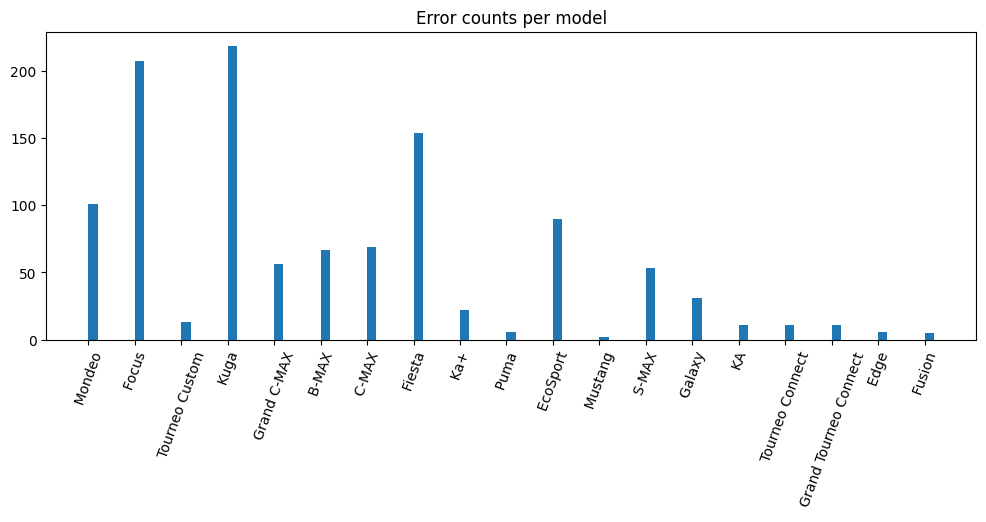

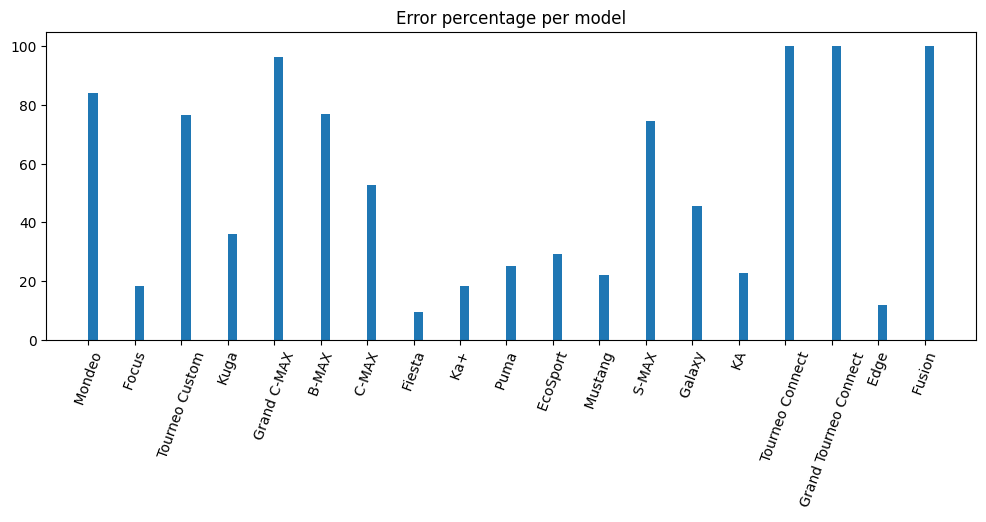

In [11]:
names = misclassified.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified[misclassified == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Error counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Error percentage per model")
plt.show()

(19,)


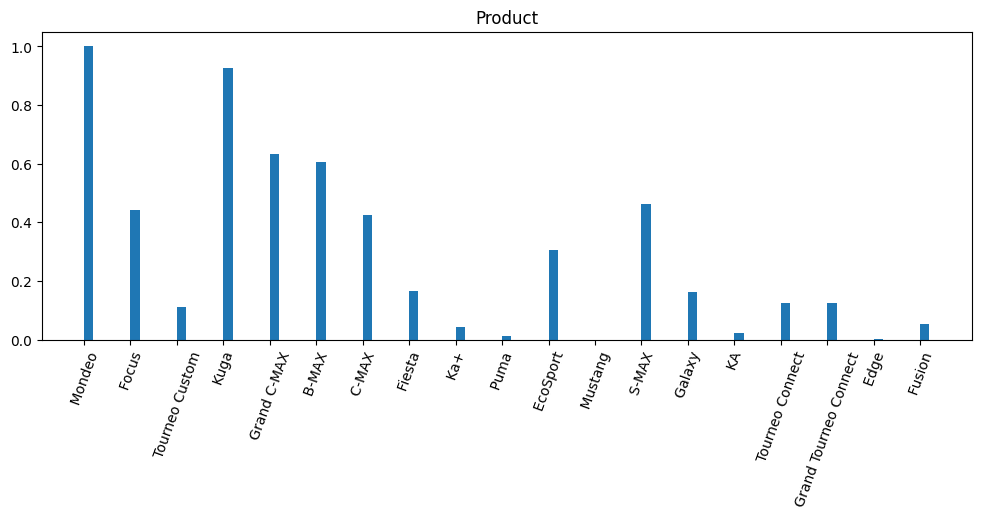

In [12]:
# scale numeric data with a scale factor
def scale(arr:np.ndarray,
          scaleFactor:int=1) -> dict:
    min = arr.min()
    max = arr.max()
    arr = scaleFactor * (arr - min) / (max - min)
    return dict(arr=arr, min=min, max=max, scaleFactor=scaleFactor)


prod = error_counts * error_percentage
scaleItem = scale(prod)
prod = scaleItem.get("arr")
print(np.shape(prod))

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=prod, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Product")
plt.show()